In [1]:
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
boston = pd.read_csv("./Datasets/Boston.csv")
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
X = boston.drop('medv', axis=1)
y = boston['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

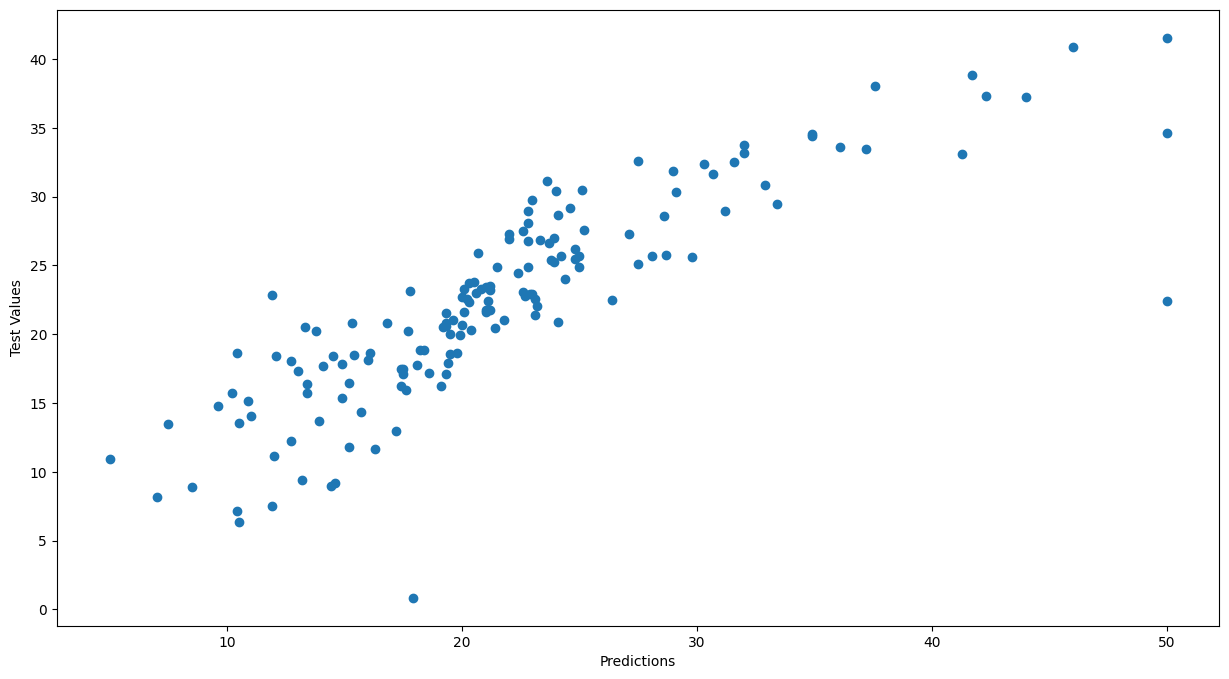

In [4]:
plt.figure(figsize=(15,8))
plt.scatter(y_test, y_pred)
plt.xlabel('Predictions')
plt.ylabel('Test Values')
plt.show()

In [5]:
print(mean_squared_error(y_test, y_pred))

20.670712756460954


In [6]:
y_bar = np.mean(y_test)


In [7]:
1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test-y_bar)**2))

0.7133431144123473

In [8]:
r2_score(y_test, y_pred)

0.7133431144123473

In [9]:
bmi_df = pd.read_csv("./Cases/Medical Cost Personal/insurance.csv")
bmi_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
X = bmi_df[['age','bmi','children']]
y = bmi_df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

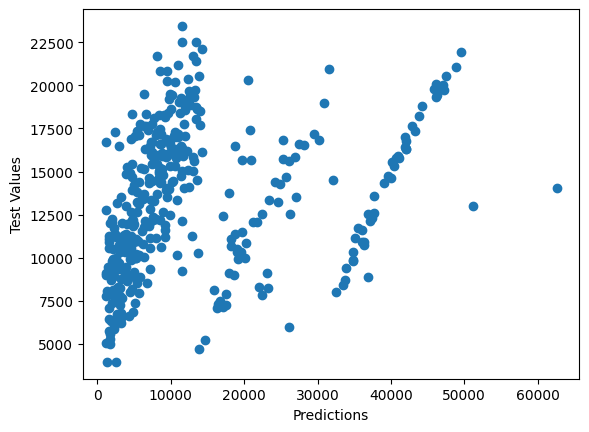

In [ ]:

plt.scatter(y_test, y_pred)
plt.xlabel('Predictions')
plt.ylabel('Test Values')
plt.show()

In [12]:

r2_score(y_test, y_pred)


0.09484846679032788

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
bmi_df['sex'] = le.fit_transform(bmi_df['sex'])
bmi_df['smoker'] = le.fit_transform(bmi_df['smoker'])
bmi_df['region'] = le.fit_transform(bmi_df['region'])




In [15]:
bmi_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [16]:
X = bmi_df.drop('charges', axis=1)
y = bmi_df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.7665658876405306

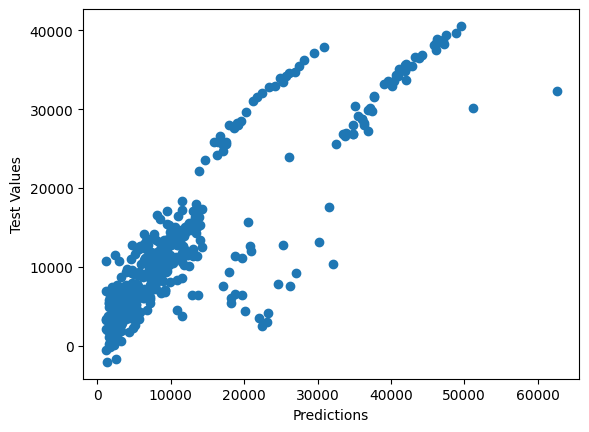

In [17]:
plt.scatter(y_test, y_pred)
plt.xlabel('Predictions')
plt.ylabel('Test Values')
plt.show()

In [18]:
pizza_df = pd.read_csv("./Datasets/pizza.csv")
pizza_df.head()

,Promote,Sales
0,23,554
1,56,1339
2,34,815
3,25,609
4,67,1600


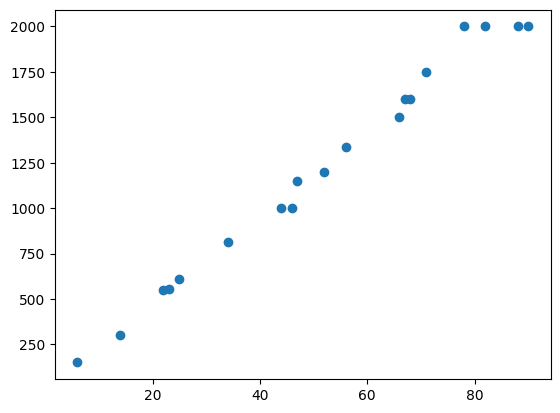

In [19]:
plt.scatter(pizza_df['Promote'], pizza_df['Sales'])

In [20]:
X = pizza_df[['Promote']]
y = pizza_df['Sales']
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [21]:
print("bo = ",lr.intercept_)
print("b1 = ",lr.coef_)


bo =  5.4858653632529695
b1 =  [23.50640302]


In [22]:
# promote = [100,200,250,300]
# # sales_l = []
# for i in promote:
#     sales = 5.48 + 23.506*i
#     # sales_l.append(sales)
#     print(f"Sales for {i} is {sales:.2f}")

tst_promote = np.array([100,200,250,300])
tst_sales = 5.48 + 23.506*tst_promote
tst_sales

array([2356.08, 4706.68, 5881.98, 7057.28])

    - Inferencing

In [23]:
tst = pd.DataFrame({'Promote':tst_promote})
lr.predict(tst)

array([2356.12616752, 4706.76646967, 5882.08662075, 7057.40677183])

In [24]:
X = bmi_df[['bmi']]
y = bmi_df['charges']
lr.fit(X,y)
print(lr.intercept_, lr.coef_)

1192.9372089611497 [393.8730308]


In [25]:
X = bmi_df[['smoker']]
y = bmi_df['charges']
lr.fit(X,y)
print(lr.intercept_, lr.coef_)

8434.268297856193 [23615.96353368]


In [26]:
bmi_df.groupby('smoker')['charges'].mean()

smoker
0     8434.268298
1    32050.231832
Name: charges, dtype: float64

In [27]:
X = bmi_df[['region']]
y = bmi_df['charges']
lr.fit(X,y)
print(lr.intercept_, lr.coef_)

13373.557599125403 [-68.0449097]


In [28]:
bmi_df.groupby('region')['charges'].mean()


region
0    13406.384516
1    12417.575374
2    14735.411438
3    12346.937377
Name: charges, dtype: float64

### 1. **PolynomialFeatures**

`PolynomialFeatures` là một kỹ thuật biến đổi đặc trưng trong thư viện scikit-learn, giúp tạo ra các đặc trưng bậc cao từ các đặc trưng ban đầu. Kỹ thuật này thường được sử dụng khi bạn muốn mô hình hóa mối quan hệ phi tuyến tính giữa các biến đầu vào, nhưng lại sử dụng các mô hình tuyến tính (như Hồi quy tuyến tính). Bằng cách thêm các đặc trưng bậc cao, mô hình có thể học được các mối quan hệ phức tạp hơn.

**Điểm chính:**
- **Biến đổi đặc trưng bậc cao (Polynomial Features):** Kỹ thuật này sẽ tạo ra các đặc trưng mới bằng cách nâng các đặc trưng ban đầu lên các bậc (degree) cao hơn. Ví dụ, nếu bạn có một đặc trưng \( x \), `PolynomialFeatures` có thể tạo ra các đặc trưng \( x^2 \), \( x^3 \), v.v., tùy theo bậc bạn chọn.
- **Đặc trưng tương tác (Interaction Features):** Kỹ thuật này cũng tạo ra các đặc trưng tương tác giữa các đặc trưng ban đầu. Ví dụ, nếu bạn có hai đặc trưng \( x_1 \) và \( x_2 \), nó có thể tạo ra một đặc trưng mới là \( x_1 \times x_2 \).

**Ví dụ sử dụng:**
```python
from sklearn.preprocessing import PolynomialFeatures

# Dữ liệu ví dụ
X = [[1, 2], [3, 4], [5, 6]]

# Tạo PolynomialFeatures với bậc = 2
poly = PolynomialFeatures(degree=2)

# Chuyển đổi các đặc trưng thành các đặc trưng bậc cao
X_poly = poly.fit_transform(X)

print(X_poly)
```

Với dữ liệu đầu vào `X = [[1, 2], [3, 4], [5, 6]]` và `degree=2`, kết quả đầu ra có thể là:

```
[[ 1.  1.  2.  1.  2.  4.]
 [ 1.  3.  4.  9. 12. 16.]
 [ 1.  5.  6. 25. 30. 36.]]
```

Ở đây:
- Cột đầu tiên là giá trị hằng số (1).
- Cột thứ hai và thứ ba là các đặc trưng ban đầu.
- Các cột còn lại là các đặc trưng bậc cao và các đặc trưng tương tác.

**Ứng dụng:**  
- Sử dụng trong các mô hình hồi quy tuyến tính hoặc các mô hình tuyến tính khác để học các mối quan hệ phi tuyến tính.
- Thích hợp khi dữ liệu của bạn có mối quan hệ phi tuyến tính và bạn muốn sử dụng mô hình tuyến tính để dự đoán.

---

### 2. **SimpleImputer**

`SimpleImputer` là một lớp trong thư viện scikit-learn dùng để xử lý các giá trị thiếu trong dữ liệu. Khi dữ liệu có chứa các giá trị thiếu (NaN), `SimpleImputer` giúp thay thế các giá trị thiếu này bằng một giá trị xác định, chẳng hạn như giá trị trung bình, trung vị, hoặc giá trị xuất hiện nhiều nhất. Việc xử lý giá trị thiếu rất quan trọng trong học máy để đảm bảo mô hình không bị lỗi do thiếu dữ liệu.

**Điểm chính:**
- **Imputation (Điền giá trị thiếu):** Quá trình thay thế các giá trị thiếu bằng một giá trị thống kê như trung bình, trung vị, hoặc giá trị phổ biến nhất.
- **Các chiến lược thay thế:** 
  - `mean`: Thay thế giá trị thiếu bằng giá trị trung bình của cột đó.
  - `median`: Thay thế giá trị thiếu bằng giá trị trung vị của cột đó.
  - `most_frequent`: Thay thế giá trị thiếu bằng giá trị xuất hiện nhiều nhất trong cột (thường dùng cho dữ liệu phân loại).
  - `constant`: Thay thế giá trị thiếu bằng một giá trị cố định mà bạn chỉ định.

**Ví dụ sử dụng:**
```python
from sklearn.impute import SimpleImputer
import numpy as np

# Dữ liệu ví dụ có giá trị thiếu (NaN)
X = [[1, 2, np.nan], [3, 4, 5], [6, np.nan, 7]]

# Tạo SimpleImputer với chiến lược 'mean'
imputer = SimpleImputer(strategy='mean')

# Áp dụng imputer vào dữ liệu và chuyển đổi dữ liệu
X_imputed = imputer.fit_transform(X)

print(X_imputed)
```

Với dữ liệu đầu vào:
```
[[1, 2, NaN], [3, 4, 5], [6, NaN, 7]]
```

Kết quả đầu ra sẽ là:
```
[[1. 2. 6.]
 [3. 4. 5.]
 [6. 3.5 7.]]
```

Ở đây:
- Các giá trị thiếu (`NaN`) đã được thay thế bằng giá trị trung bình của các cột:
  - Trung bình của cột đầu tiên là `(1+3+6)/3 = 3.33`, nhưng giá trị làm tròn là 3.
  - Trung bình của cột thứ ba là `(5+7)/2 = 6`.

**Ứng dụng:**
- Xử lý dữ liệu thiếu trong bộ dữ liệu huấn luyện và kiểm tra.
- Đảm bảo mô hình học máy hoạt động chính xác khi không có dữ liệu thiếu.
- Có thể sử dụng cho cả dữ liệu số và dữ liệu phân loại (với chiến lược là giá trị phổ biến nhất cho dữ liệu phân loại).

**Chọn chiến lược:**
- **Mean/Median:** Thường dùng cho các đặc trưng số để điền vào các giá trị thiếu.
- **Most Frequent:** Dùng cho các đặc trưng phân loại khi muốn điền giá trị thiếu bằng hạng mục phổ biến nhất.
- **Constant:** Khi bạn muốn điền một giá trị cố định (thường dùng cho các đặc trưng phân loại).

Cả `PolynomialFeatures` và `SimpleImputer` đều là các công cụ tiền xử lý dữ liệu hữu ích trong học máy, giúp cải thiện hiệu suất mô hình và xử lý các vấn đề dữ liệu trước khi đưa vào huấn luyện.

# Polynomial Regression

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
pizza_df.head()

,Promote,Sales
0,23,554
1,56,1339
2,34,815
3,25,609
4,67,1600


In [42]:
X = pizza_df[['Promote']]
y = pizza_df['Sales']
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
X_poly, poly.get_feature_names_out()


(array([[1.00000e+00, 2.30000e+01, 5.29000e+02, 1.21670e+04],
        [1.00000e+00, 5.60000e+01, 3.13600e+03, 1.75616e+05],
        [1.00000e+00, 3.40000e+01, 1.15600e+03, 3.93040e+04],
        [1.00000e+00, 2.50000e+01, 6.25000e+02, 1.56250e+04],
        [1.00000e+00, 6.70000e+01, 4.48900e+03, 3.00763e+05],
        [1.00000e+00, 8.20000e+01, 6.72400e+03, 5.51368e+05],
        [1.00000e+00, 4.60000e+01, 2.11600e+03, 9.73360e+04],
        [1.00000e+00, 1.40000e+01, 1.96000e+02, 2.74400e+03],
        [1.00000e+00, 6.00000e+00, 3.60000e+01, 2.16000e+02],
        [1.00000e+00, 4.70000e+01, 2.20900e+03, 1.03823e+05],
        [1.00000e+00, 5.20000e+01, 2.70400e+03, 1.40608e+05],
        [1.00000e+00, 8.80000e+01, 7.74400e+03, 6.81472e+05],
        [1.00000e+00, 7.10000e+01, 5.04100e+03, 3.57911e+05],
        [1.00000e+00, 7.80000e+01, 6.08400e+03, 4.74552e+05],
        [1.00000e+00, 6.60000e+01, 4.35600e+03, 2.87496e+05],
        [1.00000e+00, 4.40000e+01, 1.93600e+03, 8.51840e+04],
        

In [43]:
lr.fit(X_poly, y)

LinearRegression()

In [45]:
lr.intercept_, lr.coef_
# sales = -18.2749 + 24.800*Promote - 0.01309*Promote^2

(82.19586845433423,
 array([ 0.00000000e+00,  1.47739093e+01,  2.29013837e-01, -1.63766841e-03]))

## Insure_auto dataset

In [46]:
auto_df = pd.read_csv("./Datasets/Insure_auto.csv")
auto_df.head()

,Branch,Home,Automobile,Operating_Cost
0,B01,400,1200,124000
1,B02,350,360,71000
2,B03,600,800,136000
3,B04,800,1800,219000
4,B05,900,1600,230000


In [65]:
X = auto_df[['Home','Automobile']]
y = auto_df['Operating_Cost']
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly

array([[4.000e+02, 1.200e+03, 1.600e+05, 4.800e+05, 1.440e+06],
       [3.500e+02, 3.600e+02, 1.225e+05, 1.260e+05, 1.296e+05],
       [6.000e+02, 8.000e+02, 3.600e+05, 4.800e+05, 6.400e+05],
       [8.000e+02, 1.800e+03, 6.400e+05, 1.440e+06, 3.240e+06],
       [9.000e+02, 1.600e+03, 8.100e+05, 1.440e+06, 2.560e+06],
       [2.000e+02, 1.000e+03, 4.000e+04, 2.000e+05, 1.000e+06],
       [1.200e+02, 9.000e+02, 1.440e+04, 1.080e+05, 8.100e+05],
       [3.400e+02, 1.100e+03, 1.156e+05, 3.740e+05, 1.210e+06],
       [4.900e+02, 9.000e+02, 2.401e+05, 4.410e+05, 8.100e+05],
       [7.000e+02, 8.000e+02, 4.900e+05, 5.600e+05, 6.400e+05]])

In [69]:
poly.get_feature_names_out()

array(['Home', 'Automobile', 'Home^2', 'Home Automobile', 'Automobile^2'],
      dtype=object)

In [67]:
lr.fit(X_poly, y)


LinearRegression()

In [68]:
lr.intercept_, lr.coef_

(-1455.231030816125,
 array([ 1.47533405e+02,  5.88905218e+01, -7.94261684e-02,  9.36654775e-02,
        -2.65057986e-02]))

## Boston housing dataset


In [77]:
X = boston.drop('medv', axis=1)
y = boston['medv']


In [78]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly

array([[6.32000000e-03, 1.80000000e+01, 2.31000000e+00, ...,
        1.57529610e+05, 1.97656200e+03, 2.48004000e+01],
       [2.73100000e-02, 0.00000000e+00, 7.07000000e+00, ...,
        1.57529610e+05, 3.62766600e+03, 8.35396000e+01],
       [2.72900000e-02, 0.00000000e+00, 7.07000000e+00, ...,
        1.54315409e+05, 1.58310490e+03, 1.62409000e+01],
       ...,
       [6.07600000e-02, 0.00000000e+00, 1.19300000e+01, ...,
        1.57529610e+05, 2.23851600e+03, 3.18096000e+01],
       [1.09590000e-01, 0.00000000e+00, 1.19300000e+01, ...,
        1.54802902e+05, 2.54955600e+03, 4.19904000e+01],
       [4.74100000e-02, 0.00000000e+00, 1.19300000e+01, ...,
        1.57529610e+05, 3.12757200e+03, 6.20944000e+01]])

In [79]:
poly.get_feature_names_out()    #104


array(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'crim^2', 'crim zn',
       'crim indus', 'crim chas', 'crim nox', 'crim rm', 'crim age',
       'crim dis', 'crim rad', 'crim tax', 'crim ptratio', 'crim black',
       'crim lstat', 'zn^2', 'zn indus', 'zn chas', 'zn nox', 'zn rm',
       'zn age', 'zn dis', 'zn rad', 'zn tax', 'zn ptratio', 'zn black',
       'zn lstat', 'indus^2', 'indus chas', 'indus nox', 'indus rm',
       'indus age', 'indus dis', 'indus rad', 'indus tax',
       'indus ptratio', 'indus black', 'indus lstat', 'chas^2',
       'chas nox', 'chas rm', 'chas age', 'chas dis', 'chas rad',
       'chas tax', 'chas ptratio', 'chas black', 'chas lstat', 'nox^2',
       'nox rm', 'nox age', 'nox dis', 'nox rad', 'nox tax',
       'nox ptratio', 'nox black', 'nox lstat', 'rm^2', 'rm age',
       'rm dis', 'rm rad', 'rm tax', 'rm ptratio', 'rm black', 'rm lstat',
       'age^2', 'age dis', 'age rad', 'age tax

In [80]:
lr.fit(X_poly, y)


LinearRegression()

In [81]:
lr.intercept_, lr.coef_


(-175.28194103682463,
 array([-4.55224016e+00,  2.06712236e-01, -4.64521048e+00,  2.97133262e+01,
         1.33858102e+02,  2.16864301e+01,  9.07823179e-01, -7.48279422e+00,
         1.95078531e+00,  2.16801965e-02,  6.44278970e+00,  9.43679600e-02,
         7.23703922e-01,  1.58017676e-03,  2.17011696e-01,  3.94557388e-01,
         2.49035909e+00, -7.20584080e-01,  1.37406224e-01, -3.10178429e-03,
        -9.57410013e-02,  2.14640291e-01, -2.40608445e-02,  3.84711577e-01,
        -3.26680449e-04,  2.07852312e-02, -4.84225873e-04, -5.20706359e-03,
        -6.25235018e-02, -1.04603052e+00,  1.36359615e-02,  7.22766554e-05,
        -1.02928884e-02, -5.00752417e-03,  6.34624284e-04, -6.99385124e-03,
         6.51022107e-04, -4.49907142e-03,  3.95578681e-02,  1.17484038e-03,
         1.19293691e+00,  2.96738937e-01,  3.46104278e-03,  1.33219656e-01,
        -2.32300449e-02,  5.67274188e-04, -1.32477058e-02,  2.44803115e-03,
        -1.13629135e-02,  2.97133262e+01, -3.40679546e+01, -5.5198

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=24)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

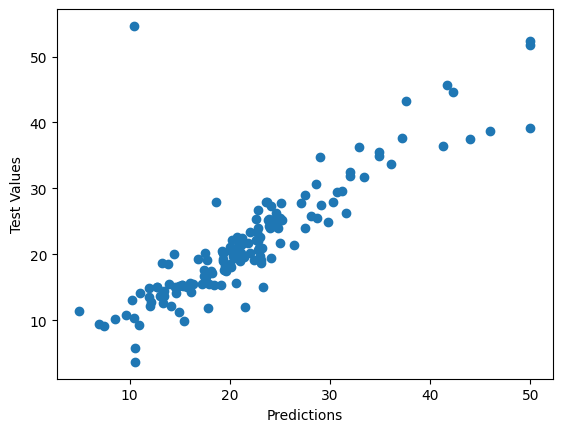

In [83]:
plt.scatter(y_test, y_pred)
plt.xlabel('Predictions')
plt.ylabel('Test Values')
plt.show()

In [84]:
r2_score(y_test, y_pred)


0.6950286613899876

## Insurance (BMI) dataset

In [91]:
bmi_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [92]:
X = bmi_df.drop('charges', axis=1)
y = bmi_df['charges']
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X, )
X_poly

array([[19.  ,  0.  , 27.9 , ...,  1.  ,  3.  ,  9.  ],
       [18.  ,  1.  , 33.77, ...,  0.  ,  0.  ,  4.  ],
       [28.  ,  1.  , 33.  , ...,  0.  ,  0.  ,  4.  ],
       ...,
       [18.  ,  0.  , 36.85, ...,  0.  ,  0.  ,  4.  ],
       [21.  ,  0.  , 25.8 , ...,  0.  ,  0.  ,  9.  ],
       [61.  ,  0.  , 29.07, ...,  1.  ,  1.  ,  1.  ]])

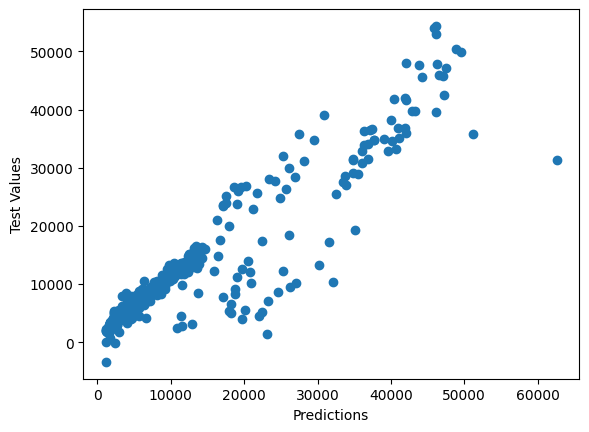

In [93]:

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=24)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Predictions')
plt.ylabel('Test Values')
plt.show()


In [94]:
r2_score(y_test, y_pred)

0.848695128340185

# Imputer

## JobSalary2 Dataset

In [104]:
job_df = pd.read_csv("./Datasets/JobSalary2.csv")
job_df.head()

,S_No,Computer,Marketing,Engineer
0,1,84.0,55.0,75
1,2,90.0,53.0,70
2,3,63.0,NaN,88
3,4,NaN,50.0,77
4,5,63.0,41.0,89


In [105]:
mean = job_df.mean()
job_df.fillna(mean)

,S_No,Computer,Marketing,Engineer
0,1,84.000000,55.000000,75
1,2,90.000000,53.000000,70
2,3,63.000000,52.571429,88
3,4,75.333333,50.000000,77
4,5,63.000000,41.000000,89
5,6,75.000000,54.000000,85
6,7,75.333333,51.000000,96
7,8,77.000000,64.000000,105


In [106]:
from sklearn.impute import SimpleImputer

### Constant Strategy

In [107]:
imp = SimpleImputer(strategy='constant', fill_value=50).set_output(transform='pandas')
imp_data = imp.fit_transform(job_df)

In [109]:
imp_data

,S_No,Computer,Marketing,Engineer
0,1.0,84.0,55.0,75.0
1,2.0,90.0,53.0,70.0
2,3.0,63.0,50.0,88.0
3,4.0,50.0,50.0,77.0
4,5.0,63.0,41.0,89.0
5,6.0,75.0,54.0,85.0
6,7.0,50.0,51.0,96.0
7,8.0,77.0,64.0,105.0


### Mean strategy

In [ ]:
imp = SimpleImputer(strategy='mean').set_output(transform='pandas')
imp_data = imp.fit_transform(job_df)
imp_data.head()

,S_No,Computer,Marketing,Engineer
0,1.0,84.000000,55.000000,75.0
1,2.0,90.000000,53.000000,70.0
2,3.0,63.000000,52.571429,88.0
3,4.0,75.333333,50.000000,77.0
4,5.0,63.000000,41.000000,89.0
5,6.0,75.000000,54.000000,85.0
6,7.0,75.333333,51.000000,96.0
7,8.0,77.000000,64.000000,105.0


## Chemical Process Dataset

In [162]:
chem_df = pd.read_csv("./Datasets/ChemicalProcess.csv")
chem_df.tail(20)

,Yield,BiologicalMaterial01,BiologicalMaterial02,BiologicalMaterial03,BiologicalMaterial04,BiologicalMaterial05,BiologicalMaterial06,BiologicalMaterial07,BiologicalMaterial08,BiologicalMaterial09,...,ManufacturingProcess36,ManufacturingProcess37,ManufacturingProcess38,ManufacturingProcess39,ManufacturingProcess40,ManufacturingProcess41,ManufacturingProcess42,ManufacturingProcess43,ManufacturingProcess44,ManufacturingProcess45
156,37.14,5.90,51.37,63.65,10.76,19.90,45.07,100.0,17.06,12.78,...,0.021,0.4,3,7.3,0.1,0.2,10.9,0.5,1.9,2.3
157,37.73,5.90,51.37,63.65,10.76,19.90,45.07,100.0,17.06,12.78,...,0.020,1.7,3,7.3,0.0,0.0,12.0,0.5,1.8,2.3
158,38.03,5.70,52.77,66.25,10.50,15.18,47.07,100.0,16.67,12.84,...,0.020,0.9,3,7.3,0.0,0.0,12.1,0.3,1.8,2.3
159,37.86,5.70,52.77,66.25,10.50,15.18,47.07,100.0,16.67,12.84,...,0.019,1.3,2,7.2,0.0,0.0,12.1,0.7,1.8,2.1
160,38.31,5.70,52.77,66.25,10.50,15.18,47.07,100.0,16.67,12.84,...,0.020,0.9,3,7.3,0.0,0.0,12.0,0.3,1.8,2.3
161,38.66,5.97,53.13,66.58,11.00,16.55,46.77,100.0,16.97,13.00,...,0.021,0.5,3,7.4,0.0,0.0,11.7,0.3,1.9,1.8
162,38.65,6.39,53.72,67.13,11.75,18.61,46.32,100.0,17.44,13.25,...,0.019,1.6,3,7.3,0.0,0.0,11.5,0.6,1.8,2.2
163,38.67,5.36,53.39,65.30,12.05,18.57,46.91,100.0,16.42,12.32,...,0.020,1.0,3,7.3,0.1,0.1,11.8,0.4,1.8,2.4
164,38.42,5.27,52.45,64.09,10.84,18.10,46.02,100.0,16.35,12.22,...,0.021,1.8,3,7.3,0.0,0.0,11.6,0.4,1.8,2.3
165,39.15,4.58,49.56,61.08,9.84,18.68,43.53,100.0,16.16,12.14,...,0.021,1.1,3,7.2,0.0,0.0,11.4,0.8,1.7,2.2


In [163]:
chem_df.isnull().sum().sum()


106

In [175]:
imp = SimpleImputer(strategy='mean').set_output(transform='pandas')
imp_data = imp.fit_transform(chem_df)
imp_data

,Yield,BiologicalMaterial01,BiologicalMaterial02,BiologicalMaterial03,BiologicalMaterial04,BiologicalMaterial05,BiologicalMaterial06,BiologicalMaterial07,BiologicalMaterial08,BiologicalMaterial09,...,ManufacturingProcess36,ManufacturingProcess37,ManufacturingProcess38,ManufacturingProcess39,ManufacturingProcess40,ManufacturingProcess41,ManufacturingProcess42,ManufacturingProcess43,ManufacturingProcess44,ManufacturingProcess45
0,38.00,6.25,49.58,56.97,12.74,19.51,43.73,100.0,16.66,11.44,...,0.019000,0.5,3.0,7.2,0.017714,0.023714,11.6,3.0,1.8,2.4
1,42.44,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.019000,2.0,2.0,7.2,0.100000,0.150000,11.1,0.9,1.9,2.2
2,42.03,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.018000,0.7,2.0,7.2,0.000000,0.000000,12.0,1.0,1.8,2.3
3,41.42,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.018000,1.2,2.0,7.2,0.000000,0.000000,10.6,1.1,1.8,2.1
4,42.49,7.47,63.33,72.25,14.02,17.91,54.66,100.0,18.22,12.80,...,0.017000,0.2,2.0,7.3,0.000000,0.000000,11.0,1.1,1.7,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,39.66,6.71,56.32,66.19,12.35,20.02,50.26,100.0,17.54,12.50,...,0.019573,2.3,0.0,0.0,0.000000,0.000000,0.0,0.6,0.0,0.0
172,39.68,6.87,56.74,66.61,12.55,20.18,50.80,100.0,17.48,12.41,...,0.019573,1.0,0.0,0.0,0.000000,0.000000,0.0,0.6,0.0,0.0
173,42.23,7.50,58.41,68.30,13.33,20.81,52.96,100.0,17.23,12.04,...,0.019573,1.3,0.0,0.0,0.000000,0.000000,0.0,0.6,0.0,0.0
174,38.48,7.53,58.36,69.25,14.35,20.57,51.31,100.0,17.87,12.77,...,0.019573,2.3,0.0,0.0,0.000000,0.000000,0.0,0.5,0.0,0.0


In [176]:
imp_data.isnull().sum().sum()


0

In [177]:
X = imp_data.drop('Yield', axis=1)
y = imp_data['Yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.24181005955062185

In [178]:
imp = SimpleImputer(strategy='median').set_output(transform='pandas')
imp_data = imp.fit_transform(chem_df)
imp_data

,Yield,BiologicalMaterial01,BiologicalMaterial02,BiologicalMaterial03,BiologicalMaterial04,BiologicalMaterial05,BiologicalMaterial06,BiologicalMaterial07,BiologicalMaterial08,BiologicalMaterial09,...,ManufacturingProcess36,ManufacturingProcess37,ManufacturingProcess38,ManufacturingProcess39,ManufacturingProcess40,ManufacturingProcess41,ManufacturingProcess42,ManufacturingProcess43,ManufacturingProcess44,ManufacturingProcess45
0,38.00,6.25,49.58,56.97,12.74,19.51,43.73,100.0,16.66,11.44,...,0.019,0.5,3.0,7.2,0.0,0.00,11.6,3.0,1.8,2.4
1,42.44,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.019,2.0,2.0,7.2,0.1,0.15,11.1,0.9,1.9,2.2
2,42.03,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.018,0.7,2.0,7.2,0.0,0.00,12.0,1.0,1.8,2.3
3,41.42,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.018,1.2,2.0,7.2,0.0,0.00,10.6,1.1,1.8,2.1
4,42.49,7.47,63.33,72.25,14.02,17.91,54.66,100.0,18.22,12.80,...,0.017,0.2,2.0,7.3,0.0,0.00,11.0,1.1,1.7,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,39.66,6.71,56.32,66.19,12.35,20.02,50.26,100.0,17.54,12.50,...,0.020,2.3,0.0,0.0,0.0,0.00,0.0,0.6,0.0,0.0
172,39.68,6.87,56.74,66.61,12.55,20.18,50.80,100.0,17.48,12.41,...,0.020,1.0,0.0,0.0,0.0,0.00,0.0,0.6,0.0,0.0
173,42.23,7.50,58.41,68.30,13.33,20.81,52.96,100.0,17.23,12.04,...,0.020,1.3,0.0,0.0,0.0,0.00,0.0,0.6,0.0,0.0
174,38.48,7.53,58.36,69.25,14.35,20.57,51.31,100.0,17.87,12.77,...,0.020,2.3,0.0,0.0,0.0,0.00,0.0,0.5,0.0,0.0


In [179]:
X = imp_data.drop('Yield', axis=1)
y = imp_data['Yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.2366120304068554

In [194]:
from sklearn.impute import SimpleImputer
import numpy as np

# Dữ liệu ví dụ có giá trị thiếu (NaN)
X = [[np.nan, 2, np.nan], [3, np.nan, 5], [np.nan, np.nan, 7]]
[print(row) for row in X]
# Tạo SimpleImputer với chiến lược 'mean'
imputer = SimpleImputer(strategy='mean')

# Áp dụng imputer vào dữ liệu và chuyển đổi dữ liệu
X_imputed = imputer.fit_transform(X)

print("=======================")
[print(row) for row in X_imputed]


[nan, 2, nan]
[3, nan, 5]
[nan, nan, 7]
[3. 2. 6.]
[3. 2. 5.]
[3. 2. 7.]


[None, None, None]

# Ridge Regression

In [195]:
from sklearn.linear_model import Ridge


In [211]:
X = boston.drop('medv', axis=1)
y = boston['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

In [212]:
ridge.intercept_, ridge.coef_

(26.59541627325045,
 array([-0.05402282,  0.03817267, -0.02582842,  2.88819539, -8.89305927,
         4.30746508, -0.01209986, -1.34263626,  0.22942427, -0.01205126,
        -0.8045876 ,  0.01077158, -0.51463194]))

In [213]:
r2_score(y_test, y_pred)

0.7069833171421402

## Optimization for best `alpha`

In [220]:
a = [0.01,0.1,0.5,1,1.4,2,2.5]
scores = []
for element in a:
    ridge = Ridge(alpha=element)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    print(f"for alpha : {element} , R-square : {r2_score(y_test, y_pred)}")
    print(f"for alpha : {element} , MSE : {mean_squared_error(y_test, y_pred)}")
    scores.append(r2_score(y_test, y_pred))
    print("-"*60)

for alpha : 0.01 , R-square : 0.7131762306996878
for alpha : 0.01 , MSE : 20.682746673877745
------------------------------------------------------------
for alpha : 0.1 , R-square : 0.7117603761659539
for alpha : 0.1 , MSE : 20.784843374997447
------------------------------------------------------------
for alpha : 0.5 , R-square : 0.7069833171421402
for alpha : 0.5 , MSE : 21.129315180373702
------------------------------------------------------------
for alpha : 1 , R-square : 0.7032547843448866
for alpha : 1 , MSE : 21.398178181159725
------------------------------------------------------------
for alpha : 1.4 , R-square : 0.7012864250547723
for alpha : 1.4 , MSE : 21.540115778102685
------------------------------------------------------------
for alpha : 2 , R-square : 0.6992929955083689
for alpha : 2 , MSE : 21.68386118114603
------------------------------------------------------------
for alpha : 2.5 , R-square : 0.6981719819420981
for alpha : 2.5 , MSE : 21.764697018656012
----

    - argmax returns the index of maximum value of the list

In [222]:
i_max = np.argmax(scores)
print("Best Aplha : ", a[i_max])

Best Aplha :  0.01


## Medical Cost Expenses dataset
    - Note all the analysis is done based on the fact that the columns are encoded (labelEncoder)

In [223]:
bmi_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [225]:
X = bmi_df.drop('charges', axis=1)
y = bmi_df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)
a = [0.001,0.01,0.5,1,1.4,2,3,5]
scores = []
for element in a:
    ridge = Ridge(alpha=element)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    print(f"for alpha : {element} , R-square : {r2_score(y_test, y_pred)}")
    print(f"for alpha : {element} , MSE : {mean_squared_error(y_test, y_pred)}")
    scores.append(r2_score(y_test, y_pred))
    print("-"*60)

for alpha : 0.001 , R-square : 0.7665652131188003
for alpha : 0.001 , MSE : 35567246.488069974
------------------------------------------------------------
for alpha : 0.01 , R-square : 0.7665591405949164
for alpha : 0.01 , MSE : 35568171.727005735
------------------------------------------------------------
for alpha : 0.5 , R-square : 0.7662235946024709
for alpha : 0.5 , MSE : 35619297.12772617
------------------------------------------------------------
for alpha : 1 , R-square : 0.7658713639048383
for alpha : 1 , MSE : 35672964.6903493
------------------------------------------------------------
for alpha : 1.4 , R-square : 0.7655825703017012
for alpha : 1.4 , MSE : 35716966.672248356
------------------------------------------------------------
for alpha : 2 , R-square : 0.7651379537074113
for alpha : 2 , MSE : 35784710.59427931
------------------------------------------------------------
for alpha : 3 , R-square : 0.7643673419643818
for alpha : 3 , MSE : 35902124.70456307
--------

In [226]:
i_max = np.argmax(scores)
print("Best Aplha : ", a[i_max])

Best Aplha :  0.001
